## `Logestic Regression, KNN, and Naive Bayes Tasks`

### Imports and load dataset 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
import os
import shutil

# Step 1: Download using kagglehub (downloads to cache folder)
original_path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# Step 2: Define your project directory
project_dir = os.path.abspath("./datasets")
os.makedirs(project_dir, exist_ok=True)

# Step 3: Move all files (skip if already exists)
for file_name in os.listdir(original_path):
    full_file_name = os.path.join(original_path, file_name)
    destination_file = os.path.join(project_dir, file_name)

    if os.path.isfile(full_file_name):
        if not os.path.exists(destination_file):
            shutil.move(full_file_name, destination_file)
        else:
            print(f"⚠️ Skipping: '{file_name}' already exists in destination.")

print("✅ Dataset files moved to:", project_dir)


c:\Users\laphouse\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Dataset files moved to: c:\Users\laphouse\Projects\NTI\datasets


In [3]:
# Load the dataset
df = pd.read_csv(os.path.join(project_dir, 'BreastCancer.csv'))
# Display the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df["diagnosis"].value_counts(),"\n\nPercentage Distribution:")
print(df["diagnosis"].value_counts()/df.shape[0] * 100)

diagnosis
B    357
M    212
Name: count, dtype: int64 

Percentage Distribution:
diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


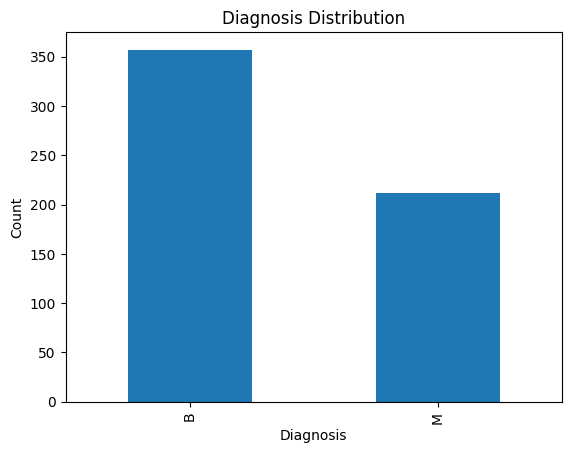

In [5]:
df["diagnosis"].value_counts().plot(kind='bar', title='Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [6]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)  # Drop unnecessary columns

In [7]:
#check after dropping columns
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.isna().sum()  # Check for missing values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.duplicated().sum()  # Check for duplicate rows

np.int64(0)

#### feature selection

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Separate features and target
X = df.drop(columns=['diagnosis'])  # Replace 'target' with your actual target column name
y = df['diagnosis']

# Print number of features before
print(f"Number of features before selection: {X.shape[1]}")

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # Evaluate all features
selector.fit(X, y)

# Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

# Drop features with high p-value (e.g., > 0.05)
insignificant = feature_scores[feature_scores['p-value'] > 0.05]['Feature'].tolist()
print("\n🔻 Dropping features with p-value > 0.05:", insignificant)

# Final selected features
X_selected = X.drop(columns=insignificant)    # orignal features still available in X

df2 = pd.concat([X_selected, y], axis=1)

# Print number of features after
print(f"✅ Number of features after selection: {X_selected.shape[1]}")


Number of features before selection: 30

🔻 Dropping features with p-value > 0.05: ['fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean', 'texture_se', 'symmetry_se']
✅ Number of features after selection: 25


#### label encoding for target


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['diagnosis'] = le.fit_transform(df2['diagnosis'])

In [14]:
# Print the mapping (dictionary form)
label_map = {cls: int(label) for cls, label in zip(le.classes_, le.transform(le.classes_))}
print("✅ Label Mapping:", label_map)

✅ Label Mapping: {'B': 0, 'M': 1}


In [15]:
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
# can use later to revert back to original labels

# df2['diagnosis'] = le.inverse_transform(df2['diagnosis'])

#### split data

In [17]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (455, 25), y_train shape: (455,)
X_test shape: (114, 25), y_test shape: (114,)


#### feature scaling 

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_train_scaled   # scaling using sklearn returns numpy array as required by sklearn models

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

#### training (Logestic Regression)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l2',          # 'l1', 'l2', 'elasticnet', or 'none'
    C=0.1,                 # Inverse of regularization strength (lower = stronger regularization)
    solver='liblinear',    # Solver to use ('liblinear' supports both L1 and L2)
    random_state=42        # For reproducibility
)

model.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, random_state=42, solver='liblinear')

#### evaluation

In [21]:
# Evaluate the model
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler   
y_pred = model.predict(X_test_scaled)   
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

✅ Model Accuracy: 98.25%


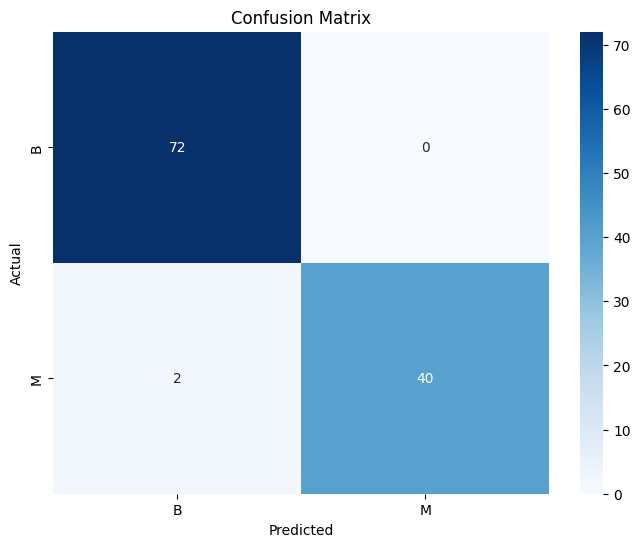

In [22]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Print classification report
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



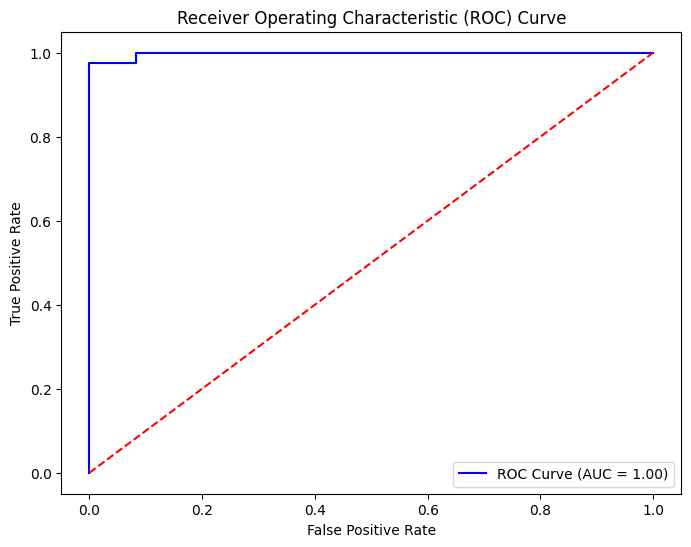

In [24]:
# Roc Curve -> reflects the diagnostic ability of a binary classifier at different threshold levels.
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve (set correct positive label)
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='M')  

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Train KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
# Fit the model on the training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### evaluation

✅ KNN Model Accuracy: 96.49%


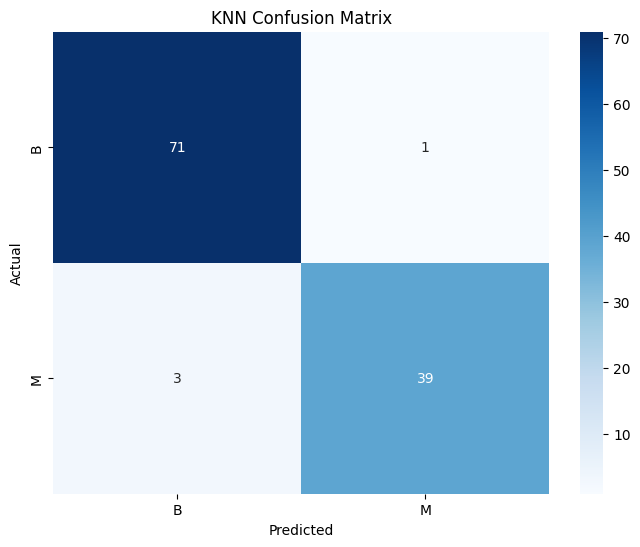

In [26]:
# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test_scaled)
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"✅ KNN Model Accuracy: {accuracy_knn * 100:.2f}%")
# Print confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('KNN Confusion Matrix')   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Print classification report for KNN
class_report_knn = classification_report(y_test, y_pred_knn, target_names=le.classes_)
print("KNN Classification Report:\n", class_report_knn)

KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Train Naive Bayes

##### `Gaussian Naive Bayes`

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [29]:
# as all feature are continuous, we can use Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()
# Fit the model on the training data
gnb_model.fit(X_train_scaled, y_train)

GaussianNB()

✅ Gaussian Naive Bayes Model Accuracy: 92.11%


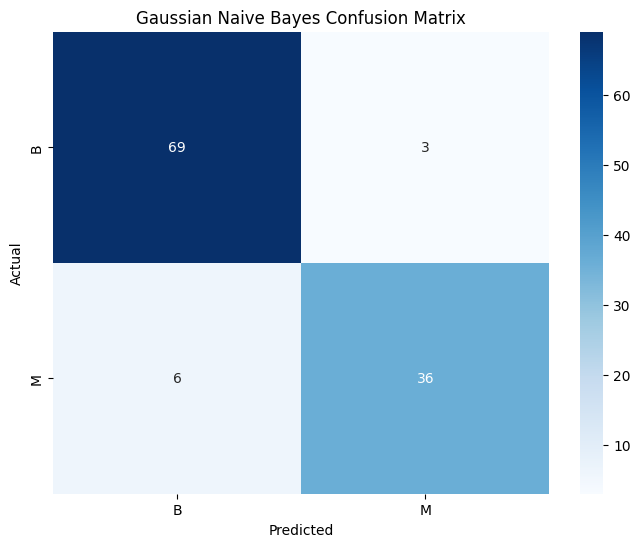

In [30]:
# Evaluate the Gaussian Naive Bayes model
y_pred_gnb = gnb_model.predict(X_test_scaled)
# Calculate accuracy for Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"✅ Gaussian Naive Bayes Model Accuracy: {accuracy_gnb * 100:.2f}%")
# Print confusion matrix for Gaussian Naive Bayes
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Print classification report for Gaussian Naive Bayes
class_report_gnb = classification_report(y_test, y_pred_gnb, target_names=le.classes_)
print("Gaussian Naive Bayes Classification Report:\n", class_report_gnb)

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.96      0.94        72
           M       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



##### `Try Bernoulli Naive Bayes`

In [32]:
# requires binarization of features firstly
X_train_binary = (X_train_scaled > 0).astype(int)
X_test_binary = (X_test_scaled > 0).astype(int)


In [33]:
# intiallize Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
# Fit the model on the binary training data
bnb_model.fit(X_train_binary, y_train)

BernoulliNB()

✅ Bernoulli Naive Bayes Model Accuracy: 93.86%


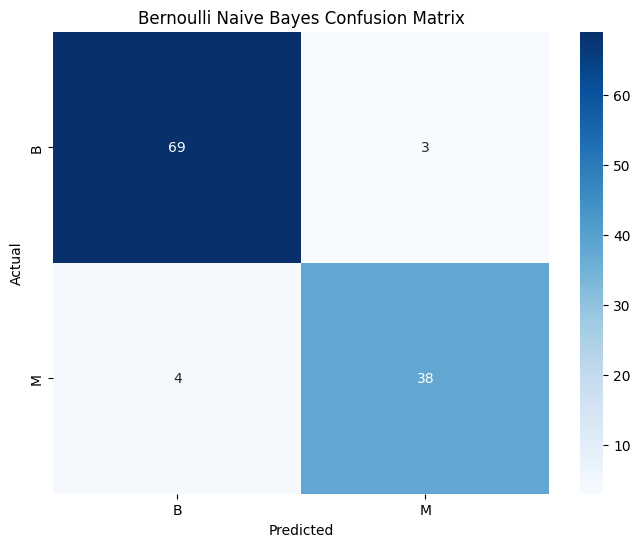

In [34]:
# Evaluate the Bernoulli Naive Bayes model
y_pred_bnb = bnb_model.predict(X_test_binary)
# Calculate accuracy for Bernoulli Naive Bayes
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"✅ Bernoulli Naive Bayes Model Accuracy: {accuracy_bnb * 100:.2f}%")
# Print confusion matrix for Bernoulli Naive Bayes
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Print classification report for Bernoulli Naive Bayes
class_report_bnb = classification_report(y_test, y_pred_bnb, target_names=le.classes_)
print("Bernoulli Naive Bayes Classification Report:\n", class_report_bnb)
# Note: The Bernoulli Naive Bayes model is typically used for binary/boolean features.
# In this case, we binarized the features to fit the model.

Bernoulli Naive Bayes Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.95        72
           M       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



- slightly better than Gaussian Naive Bayes

- `note:` accuracy is slightly lower than predicted, because of the stratification i did while spliting
- Look on the bright side: it reflects the true expected preformance in real life 

#### Just for illustration, here’s a try without stratification



In [36]:
# Split the dataset into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# binarize the features for Bernoulli Naive Bayes
X_train_binary = (X_train_scaled > 0).astype(int)
X_test_binary = (X_test_scaled > 0).astype(int)

In [37]:
# intiallize Guassian Naive Bayes
gnb_model = GaussianNB()
# Fit the model on the training data
gnb_model.fit(X_train_scaled, y_train)
# Evaluate the Gaussian Naive Bayes model
y_pred_gnb = gnb_model.predict(X_test_scaled)
# Calculate accuracy for Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"✅ Gaussian Naive Bayes Model Accuracy (without stratification): {accuracy_gnb * 100:.2f}%")

✅ Gaussian Naive Bayes Model Accuracy (without stratification): 96.49%


In [38]:
# intiallize Bernoulli Naive Bayes
bnb_model = BernoulliNB()
# Fit the model on the binary training data
bnb_model.fit(X_train_binary, y_train)
# Evaluate the Bernoulli Naive Bayes model
y_pred_bnb = bnb_model.predict(X_test_binary)
# Calculate accuracy for Bernoulli Naive Bayes
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"✅ Bernoulli Naive Bayes Model Accuracy (without stratification): {accuracy_bnb * 100:.2f}%")


✅ Bernoulli Naive Bayes Model Accuracy (without stratification): 98.25%


- higher accuracy but its misleading, always check on imbalance specially in binary clf tasks